In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the data
store = pd.read_csv('store.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv', low_memory=False)

In [27]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [28]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [29]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [30]:
# Merge the DataFrames on the 'Store' column
trainStore = pd.merge(train, store, on='Store')
trainStore.to_csv('trainStore.csv', index=False)

In [31]:
trainStore = trainStore.dropna()
trainStore.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
942,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
943,2,4,2015-07-30,5567,601,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
944,2,3,2015-07-29,6402,727,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
945,2,2,2015-07-28,5671,646,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
946,2,1,2015-07-27,6627,638,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
trainStore_encoded_label = trainStore.copy()

for column in trainStore_encoded_label.columns:
    if trainStore_encoded_label[column].dtype == 'object':
        trainStore_encoded_label[column] = label_encoder.fit_transform(trainStore_encoded_label[column])

trainStore_encoded_label.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
942,2,5,941,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1
943,2,4,940,5567,601,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1
944,2,3,939,6402,727,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1
945,2,2,938,5671,646,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1
946,2,1,937,6627,638,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,1


<Axes: >

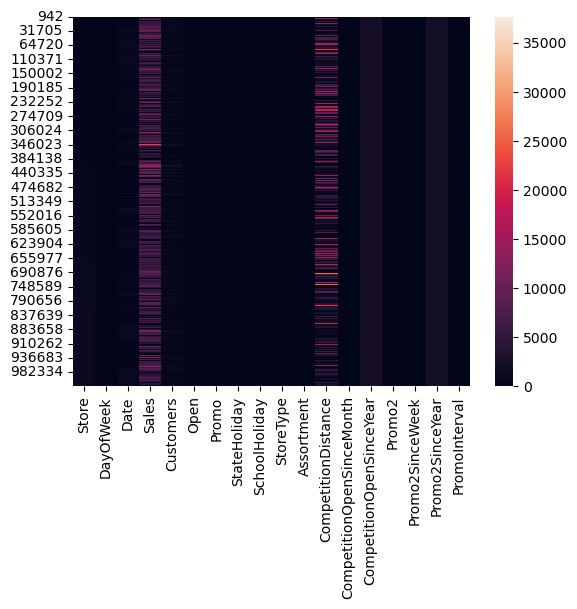

In [33]:
import seaborn as sns

sns.heatmap(trainStore_encoded_label)